In [1]:
import time
start_time = time.time()

In [2]:
import pandas as pd
import os
from bidi.algorithm import get_display
import re
import multiprocessing

In [3]:
import pickle

In [4]:
file_type = 'thread'
field_name = 'title'

In [5]:
pickle_file = open(f'{file_type}_{field_name}_token_lists.pickle', "rb" )
corpus = pickle.load( pickle_file )
pickle_file.close()

In [6]:
corpus_temp = list()
for sentence in corpus:
    sentence_temp = list()
    for word in sentence:
        try:
            if len(word) > 1:
                sentence_temp.append(get_display(word))
        except:
            print(word)
    corpus_temp.append(' '.join(reversed(sentence_temp)))
corpus = corpus_temp

⁦乁[ᓀ˵▾˵ᓂ]ㄏ⁩


In [7]:
corpus[0]

'.רוזע וא רזעיהל ,ןיינעתה ואו הנורוק רבשמ לצ תותומע'

In [8]:
##Creating a list of stop words and adding custom stopwords
import codecs
with codecs.open('stopwords.txt', 'r', encoding='utf8') as f:
    text = f.read()
stop_words = set(get_display(word) for word in text.split('\r\n'))

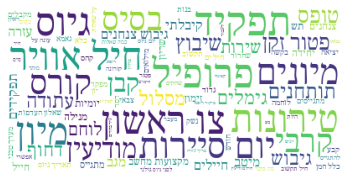

In [9]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42,
                          font_path='Fonts/FrankRuhlLibre-Regular.ttf'
                         ).generate(' '.join(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1200)

In [10]:
new_corpus = list()
for sentence in corpus:
    new_corpus.append(' '.join([word for word in sentence.split() if not word in stop_words]))

In [11]:
corpus = new_corpus

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(new_corpus)

In [15]:
list(cv.vocabulary_.keys())[:10]

['רוזע',
 'ואו',
 'הנורוק',
 'לצ',
 'דיקפת',
 'ץוביש',
 'דיקפת ץוביש',
 'ןוחטי',
 'םילהנמ',
 'ןוחטיב']

In [16]:
import seaborn

[Text(0, 0, 'סויג'),
 Text(0, 0, 'ליח'),
 Text(0, 0, 'ליפורפ'),
 Text(0, 0, 'דיקפת'),
 Text(0, 0, 'שוביג'),
 Text(0, 0, 'ןוימ'),
 Text(0, 0, 'סרוק'),
 Text(0, 0, 'רוטפ'),
 Text(0, 0, 'יברק'),
 Text(0, 0, 'הרזע'),
 Text(0, 0, 'םינוימ'),
 Text(0, 0, 'ןיעידומ'),
 Text(0, 0, 'תונוריט'),
 Text(0, 0, 'וצ'),
 Text(0, 0, 'ריווא'),
 Text(0, 0, 'תוריש'),
 Text(0, 0, 'תורייס'),
 Text(0, 0, 'סיסב'),
 Text(0, 0, 'ץוביש'),
 Text(0, 0, 'יתלביק')]

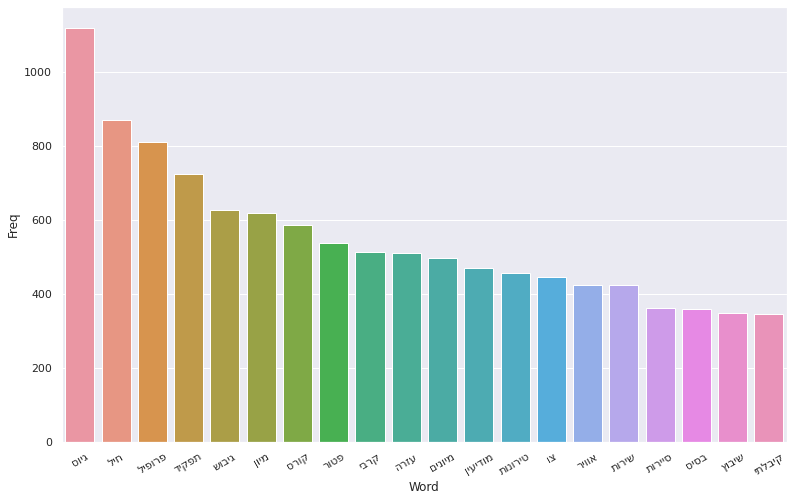

In [17]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

         Bi-gram  Freq
0      ריווא ליח   364
1       ןקז רוטפ   226
2        55 ספוט   174
3   םינחנצ שוביג   158
4   בשחמ תועוצקמ   154
5   תופדעה ןולאש   126
6     סויג ךיראת   120
7         םי ליח   107
8      ינכט ךרעמ    95
9      בושקת ליח    92
10    תולאש הנוע    90
11      ןושאר וצ    86
12   ןיעידומ ליח    81
13    אפור רוקיב    80
14      ליח ינכט    79
15     הרזע בייח    78
16     םידהב ריע    76
17      ןוי ןיצק    76
18    יברק ףוסיא    75
19    02 תונוריט    71


[Text(0, 0, 'ריווא ליח'),
 Text(0, 0, 'ןקז רוטפ'),
 Text(0, 0, '55 ספוט'),
 Text(0, 0, 'םינחנצ שוביג'),
 Text(0, 0, 'בשחמ תועוצקמ'),
 Text(0, 0, 'תופדעה ןולאש'),
 Text(0, 0, 'סויג ךיראת'),
 Text(0, 0, 'םי ליח'),
 Text(0, 0, 'ינכט ךרעמ'),
 Text(0, 0, 'בושקת ליח'),
 Text(0, 0, 'תולאש הנוע'),
 Text(0, 0, 'ןושאר וצ'),
 Text(0, 0, 'ןיעידומ ליח'),
 Text(0, 0, 'אפור רוקיב'),
 Text(0, 0, 'ליח ינכט'),
 Text(0, 0, 'הרזע בייח'),
 Text(0, 0, 'םידהב ריע'),
 Text(0, 0, 'ןוי ןיצק'),
 Text(0, 0, 'יברק ףוסיא'),
 Text(0, 0, '02 תונוריט')]

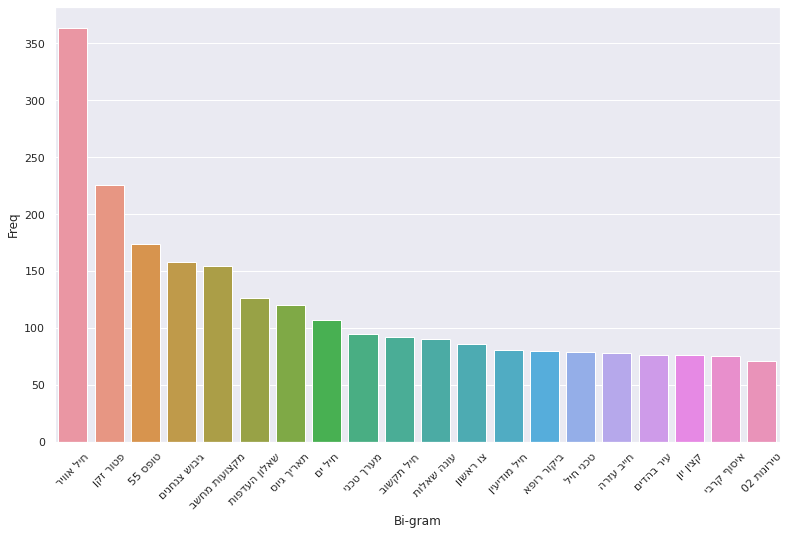

In [18]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

               Tri-gram  Freq
0        ריווא ליח ינכט    61
1     בשחמ תועוצקמ ןוימ    40
2         ליח ינכט ךרעמ    40
3   רבייס תונכת תועוצקמ    31
4   הקזחא היגולונכט ליח    30
5          יתד ןקז רוטפ    26
6   בשחמ תועוצקמ םינוימ    25
7    תוללוצ םילבוח ןוימ    24
8         ישיא ןקז רוטפ    23
9        יאופר ןקז רוטפ    21
10      תיאבצ םדק הניכמ    19
11   םייברק םישבוח סרוק    18
12       ףוחד הרזע בייח    15
13        יאבצ ןיד ךרוע    15
14        יברקל 55 ספוט    14
15       יטקט בשק ליעפמ    14
16       ישפנ 45 ליפורפ    14
17           אבק 40 רפד    14
18       ישפנ 21 ליפורפ    13
19      ריווא לייח ינכט    13


[Text(0, 0, 'ריווא ליח ינכט'),
 Text(0, 0, 'בשחמ תועוצקמ ןוימ'),
 Text(0, 0, 'ליח ינכט ךרעמ'),
 Text(0, 0, 'רבייס תונכת תועוצקמ'),
 Text(0, 0, 'הקזחא היגולונכט ליח'),
 Text(0, 0, 'יתד ןקז רוטפ'),
 Text(0, 0, 'בשחמ תועוצקמ םינוימ'),
 Text(0, 0, 'תוללוצ םילבוח ןוימ'),
 Text(0, 0, 'ישיא ןקז רוטפ'),
 Text(0, 0, 'יאופר ןקז רוטפ'),
 Text(0, 0, 'תיאבצ םדק הניכמ'),
 Text(0, 0, 'םייברק םישבוח סרוק'),
 Text(0, 0, 'ףוחד הרזע בייח'),
 Text(0, 0, 'יאבצ ןיד ךרוע'),
 Text(0, 0, 'יברקל 55 ספוט'),
 Text(0, 0, 'יטקט בשק ליעפמ'),
 Text(0, 0, 'ישפנ 45 ליפורפ'),
 Text(0, 0, 'אבק 40 רפד'),
 Text(0, 0, 'ישפנ 21 ליפורפ'),
 Text(0, 0, 'ריווא לייח ינכט')]

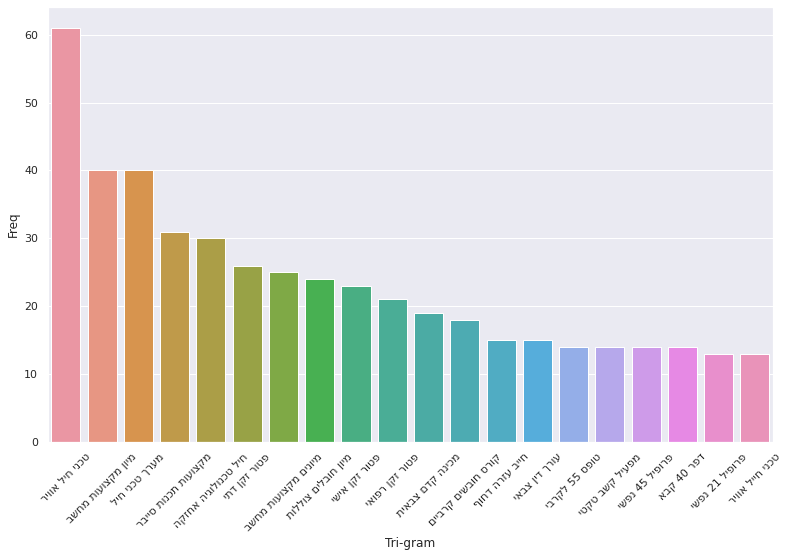

In [19]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [31]:
#Most frequently occuring Tri-grams
def display_top_n_gram_words(n_gram_parameter=2):
    def get_top_n_gram_words(corpus,n_gram, n=None):
        vec1 = CountVectorizer(ngram_range=(n_gram,n_gram), 
               max_features=2000).fit(corpus)
        bag_of_words = vec1.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in     
                      vec1.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], 
                    reverse=True)
        return words_freq[:n]
    topn_words = get_top_n_gram_words(corpus,n_gram_parameter, n=20)
    topn_df = pd.DataFrame(topn_words)
    topn_df.columns=["Four-gram", "Freq"]
    print(topn_df)
    #Barplot of most freq Tri-grams
    import seaborn as sns
    sns.set(rc={'figure.figsize':(13,8)})
    j=sns.barplot(x="Four-gram", y="Freq", data=topn_df)
    j.set_xticklabels(j.get_xticklabels(), rotation=45)

                               Four-gram  Freq
0          הקזחא היגולונכט ליח ינכט ךרעמ     9
1              ריווא לייח יטקט בשק ליעפמ     4
2   ריווא ליח םייניעידומ םייעצבמ םידיקפת     3
3                   ליפורפ 55 אבק 70 רפד     3
4                   ליפורפ 56 אבק 90 רפד     3
5                   ליפורפ 52 אבק 40 רפד     3
6            בושקת ליח בשחמ תועוצקמ ןוימ     3
7                    ןופלט סמ רמוש לת הצ     3
8          דוחא תיברע ינוי תולוכשא גוזימ     2
9                      ףונ לת 22 אי תרשמ     2
10      הליגר תונוריט ןולא הווחמ תונוריט     2
11            ןבק דיקפת תוחרזא עבקל סויג     2
12         ןטוחלא גווסמ בושקת רמוח יארחא     2
13             רוערע בתכמ תביתכ סיט סרוק     2
14              בתכמ תביתכ סיט סרוק החדה     2
15       ריווא ליח תינורטקלא המחול ליעפמ     2
16         תופדעה ןולאש דיקפת תריחב הרזע     2
17             תושר קיתע דיקפת ףיעהל רדס     2
18             קיתע דיקפת ףיעהל רדס תושר     2
19           דיקפת ףיעהל רדס תושר קיתעהל     2


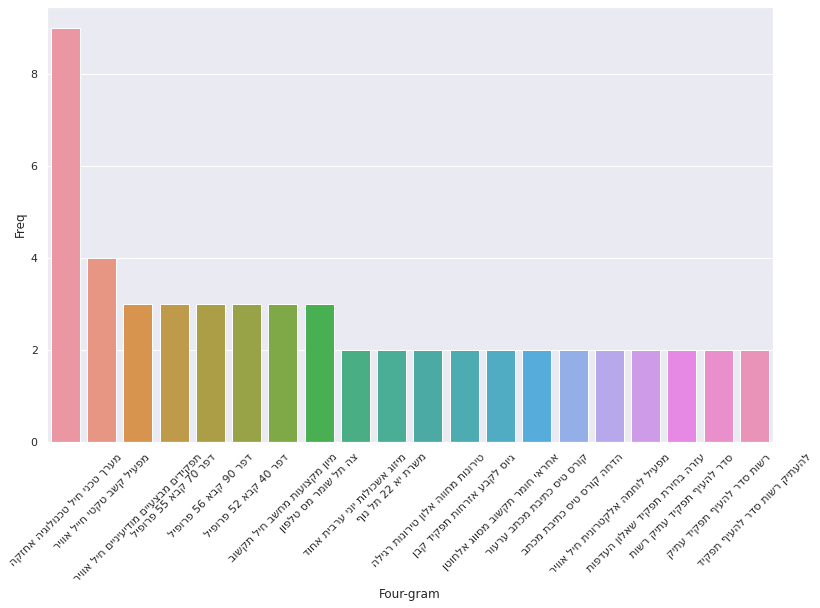

In [33]:
display_top_n_gram_words(n_gram_parameter=5)

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [21]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
חמסב ץרמ הייחד

Keywords:
הייחד 0.625
חמסב 0.611
ץרמ 0.486


In [22]:
def send_email(user='dsakaidf@gmail.com', pwd='d54k4idf!', recipient='shkasta@post.bgu.ac.il',
               subject='finish expirement', body='finish the expirement'):
    import smtplib

    gmail_user = user
    gmail_pwd = pwd
    FROM = user
    TO = recipient if type(recipient) is list else [recipient]
    SUBJECT = subject
    TEXT = body

    # Prepare actual message
    message = """From: %s\nTo: %s\nSubject: %s\n\n%s
    """ % (FROM, ", ".join(TO), SUBJECT, TEXT)
    try:
        # SMTP_SSL Example
        server_ssl = smtplib.SMTP_SSL("smtp.gmail.com", 465)
        server_ssl.ehlo()  # optional, called by login()
        server_ssl.login(gmail_user, gmail_pwd)
        # ssl server doesn't support or need tls, so don't call server_ssl.starttls()
        server_ssl.sendmail(FROM, TO, message)
        # server_ssl.quit()
        server_ssl.close()
        print('successfully sent the mail')
    except:
        print("failed to send mail")


In [23]:
send_email()

successfully sent the mail


In [24]:
elapsed_time = time.time() - start_time
print(elapsed_time)

56.25439095497131
